# Convolutional Neural Network (CNN) for MNIST Dataset


Convolutional Neural Networks are very similar to ordinary Neural Networks, they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply. ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.


MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is. 


In this project we will develop a deep learning model on the MNIST handwritten number recognition in Python using the Keras deep learning library running Theano in the backend.

## Load Dataset

Keras deep learning library provides a method to load the MNIST dataset.

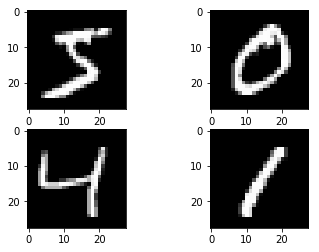

In [33]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Import Classes

Importing the Keras classes and other functions we will need.

In [34]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

## Initialize Variables

Intializing variables that we need in our program.

In [35]:
# set batch and epoch sizes
batch_size = 200
epochs = 10

# fix random seed for reproducibility
seed = 93
numpy.random.seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28

print("Variables intialized")

Variables intialized


## Reshape data 

Reduce the images down into a vector of pixels in the size of 28×28 and will be 784 pixels.

In [36]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols).astype('float32')
input_shape = (1, img_rows, img_cols)

The pixel values are scale between 0 and 255. We will normalize the pixel values to the range 0 and 1.

In [37]:
# normalize inputs from 0-255 to 0-1
X_train /= 255
X_test  /= 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('x_train shape:', (60000L, 1L, 28L, 28L))
(60000L, 'train samples')
(10000L, 'test samples')


The output is an integer from 0 to 9. Since it is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [38]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Define Model

We will create a Sequential model and add layers to complete our network topology.

In [39]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

## Compile Model

We will use logarithmic loss as "binary_crossentropy" and efficient gradient descent algorithm “Adam” for compiling our model.

In [40]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

## Fit Model

The training process will run for a fixed number of iterations through the dataset called epochs. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size.

In [41]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
50s - loss: 0.3879 - acc: 0.8774 - val_loss: 0.0729 - val_acc: 0.9763
Epoch 2/10
49s - loss: 0.0957 - acc: 0.9710 - val_loss: 0.0525 - val_acc: 0.9828
Epoch 3/10
49s - loss: 0.0688 - acc: 0.9786 - val_loss: 0.0348 - val_acc: 0.9892
Epoch 4/10
49s - loss: 0.0559 - acc: 0.9822 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 5/10
52s - loss: 0.0464 - acc: 0.9852 - val_loss: 0.0298 - val_acc: 0.9900
Epoch 6/10
149s - loss: 0.0399 - acc: 0.9874 - val_loss: 0.0252 - val_acc: 0.9914
Epoch 7/10
195s - loss: 0.0362 - acc: 0.9887 - val_loss: 0.0268 - val_acc: 0.9911
Epoch 8/10
88s - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0236 - val_acc: 0.9927
Epoch 9/10
51s - loss: 0.0298 - acc: 0.9904 - val_loss: 0.0265 - val_acc: 0.9916
Epoch 10/10
64s - loss: 0.0280 - acc: 0.9906 - val_loss: 0.0220 - val_acc: 0.9931


## Evaluate Model

Now we can evaluate the model on training dataset. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

In [42]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.022037403795970023, 0.99309999999999998]


In [65]:
print('Test Loss:     %.2f%%' % (scores[0]))
print('Test Accuracy: {:.2%}'.format(scores[1]))
print('Test Error:    {:.2%}'.format(1-scores[1]))

Test Loss:     0.02%
Test Accuracy: 99.31%
Test Error:    0.69%
